In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [87]:
data = pd.read_csv ('pre_post.csv')
data

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1001,25,1.78,-2.9,-0.92,-1.5,-10,-10,0,3.7,...,0.08,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07
1,1015,20,1.82,-2.5,-0.75,-4.0,3,1,3,-0.3,...,-0.14,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19
2,1018,18,1.82,2.6,0.78,2.0,-3,8,2,3.2,...,0.15,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09
3,1019,20,1.82,-6.3,-1.89,-9.0,7,3,0,-4.1,...,0.22,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06
4,1020,19,1.85,0.0,0.00,0.0,0,-9,-4,-5.6,...,0.00,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02
5,1021,22,1.80,0.0,0.00,0.0,8,0,-4,-3.7,...,0.19,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01
6,1022,19,1.87,0.9,0.26,-2.0,-7,-9,-21,-0.1,...,0.08,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10
7,1023,22,1.88,1.0,0.28,0.0,10,-5,3,-23.4,...,0.15,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01
8,1024,20,1.76,1.4,0.45,4.0,-12,-9,-13,0.7,...,-0.06,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18
9,1026,18,1.71,0.1,0.03,1.5,3,-10,26,-1.0,...,0.08,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05


In [88]:
data.columns

Index(['Number\n', 'Age\n(Years)', 'Height \n(m)', 'Weight\n(kg)',
       'BMI\n(kg/m^2)', 'Waist circumference \n(cm)',
       'Systolic Blood Pressure at rest (mmHg)',
       'Diastolic Blood Pressure at rest (mmHg)', 'Heart rate at rest\n(bpm)',
       'Body fat %', 'Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 'Visceral fat\n(Litres) ',
       'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat', '% Carbohydrate',
       'Hand grip strength - dominant\n(kg)',
       'Normative Percentiles \n(Wang et al., 2019)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Normative Percentiles (Hoffmann et al., 2019)', 'Back strength\n(kg)',
       'Back strength/kg', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       

In [89]:
data1 = data.copy()
data1 = data[[ 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       'Ventilatory threshold 1\n(mL/kg/min)', 'VT1/SMM\n(mL/kg/min)',
       'VT 1 \n%Normal', 'VT 1 \n%VO2max',
       'Ventilatory threshold 2\n(mL/kg/min)', 'VT2/SMM\n(mL/kg/min)',
       'VT2\n%Normal', 'VT2\n%VO2max', 'Functional Threshold Power\n(Watts)',
       'FTP/BW\n(W/kg)', 'FTP/SMM\n(W/kg)','PFO \n(g/min)', 'PCHOox \n(g/min)']]
data1

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 1\n(mL/kg/min),VT1/SMM\n(mL/kg/min),VT 1 \n%Normal,VT 1 \n%VO2max,Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),VT2\n%Normal,VT2\n%VO2max,Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,0.48,10.30,35.74,10,0.37,1.75,10,10,29.29,20,9.00,10,31.95,16,5.56,0,0.18,1.17,0.12,0.80
1,-0.24,-1.92,-6.03,-50,-0.62,-1.64,-5,-2,-5.41,-5,-1.00,-13,-33.65,-26,-22.00,-40,-0.50,-1.32,0.16,0.61
2,0.07,-0.46,1.97,0,-0.08,0.00,0,1,3.71,3,2.00,-4,-7.15,-9,-10.00,-30,-0.42,-0.85,-0.11,1.24
3,0.43,6.88,9.52,50,0.68,1.20,25,8,18.18,21,14.00,5,6.59,12,2.00,60,0.74,1.51,-0.04,1.34
4,-0.40,-5.46,-9.38,-20,-0.27,-0.41,-15,-3,-5.71,-6,-2.00,-4,-6.72,-8,1.00,10,0.14,0.45,0.01,0.78
5,-0.39,-4.69,-14.74,20,0.24,0.19,-20,3,4.77,8,13.00,0,-3.99,0,10.00,60,0.72,1.31,-0.14,-0.66
6,0.04,0.03,0.87,-20,-0.28,-0.61,0,0,0.25,0,-1.00,-1,-1.75,-4,-5.00,-20,-0.27,-0.60,-0.12,1.15
7,-0.48,-6.00,-13.69,0,0.00,0.00,-25,-5,-12.88,-11,-3.82,-2,-3.56,-2,2.82,-10,-0.14,-0.24,0.02,0.34
8,0.34,3.87,8.19,0,-0.07,-0.21,10,-3,-7.09,-8,-10.00,2,3.99,5,-4.00,20,0.22,0.47,-0.29,0.02
9,0.14,1.81,2.37,0,0.00,-0.14,0,5,10.69,13,11.00,8,16.95,19,18.00,40,0.53,1.10,0.04,0.47


In [90]:
from sklearn import preprocessing
data_scaled_1 = preprocessing.scale(data1)
data_scaled_1 = pd.DataFrame(data_scaled_1[:,:], columns=data1.columns)
data_scaled_1

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 1\n(mL/kg/min),VT1/SMM\n(mL/kg/min),VT 1 \n%Normal,VT 1 \n%VO2max,Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),VT2\n%Normal,VT2\n%VO2max,Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,1.355082,1.951999,2.438702,0.388182,1.083187,1.947714,0.829690,2.020899,2.333613,1.691113,0.936292,1.716931,2.102189,1.381419,0.710444,-0.119081,0.268282,0.992694,0.923816,0.202317
1,-0.821109,-0.542260,-0.637926,-2.152643,-1.944639,-2.029846,-0.276563,-0.673633,-0.720275,-0.747992,-0.404140,-2.104625,-2.155957,-2.082437,-2.010868,-1.262263,-1.284331,-1.516756,1.219437,-0.139374
2,0.115862,-0.244255,-0.048675,-0.035289,-0.293098,-0.105599,0.092188,0.000000,0.082361,0.032521,-0.002011,-0.609234,-0.435822,-0.680400,-0.825972,-0.976467,-1.101671,-1.043085,-0.776006,0.993599
3,1.203958,1.253933,0.507431,2.082065,2.031294,1.302387,1.935943,1.571810,1.355841,1.788677,1.606508,0.886158,0.456052,1.051528,0.358925,1.595690,1.546905,1.335350,-0.258669,1.173436
4,-1.304707,-1.264819,-0.884675,-0.882231,-0.874195,-0.586661,-1.014065,-0.898177,-0.746677,-0.845556,-0.538183,-0.609234,-0.407910,-0.597928,0.260183,0.166714,0.176952,0.267070,0.110858,0.166349
5,-1.274482,-1.107652,-1.279473,0.811652,0.685593,0.117332,-1.382816,0.449089,0.175650,0.520342,1.472464,0.055385,-0.230704,0.061855,1.148856,1.595690,1.501240,1.133788,-0.997722,-2.423302
6,0.025187,-0.144240,-0.129697,-0.882231,-0.904779,-0.821325,0.092188,-0.224544,-0.222148,-0.260171,-0.404140,-0.110770,-0.085304,-0.268036,-0.332265,-0.690672,-0.759182,-0.791132,-0.849911,0.831746
7,-1.546506,-1.375040,-1.202134,-0.035289,-0.048425,-0.105599,-1.751567,-1.347266,-1.377696,-1.333377,-0.782142,-0.276924,-0.202792,-0.103091,0.439893,-0.404877,-0.462359,-0.428320,0.184763,-0.624933
8,0.931934,0.639553,0.409468,-0.035289,-0.262513,-0.351996,0.829690,-0.898177,-0.868128,-1.040685,-1.610529,0.387694,0.287284,0.474218,-0.233523,0.452509,0.359613,0.287226,-2.106301,-1.200411
9,0.327436,0.219081,-0.019212,-0.035289,-0.048425,-0.269864,0.092188,0.898177,0.696659,1.008163,1.204378,1.384622,1.128528,1.628837,1.938787,1.024100,1.067422,0.922147,0.332574,-0.391145


In [91]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled_1)
    wcss.append(kmeans.inertia_)

wcss1 = pd.DataFrame(wcss)
wcss1.to_csv('Pre-Post WCSS.csv')
wcss

[239.99999999999997,
 136.70595400007025,
 108.0906199958302,
 78.62161291006474,
 60.43677339082984,
 43.595673311024036,
 35.50223999460294,
 24.536651376663407,
 8.894097417947973,
 4.310906927011123,
 1.5491382840962695]

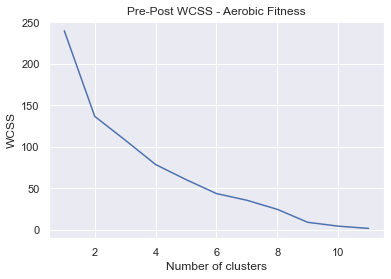

In [92]:
plt.plot(range(1,12),wcss)
plt.title('Pre-Post WCSS - Aerobic Fitness')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Pre-Post WCSS.jpg')

In [93]:
data_scaled_2 = data_scaled_1.copy()
data_scaled_3 = data_scaled_1.copy()

In [94]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto")
data_scaled_1['clusters'] = clustering_kmeans.fit_predict(data_scaled_1)
data_scaled_1['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     0
1     1
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     0
10    0
11    1
Name: clusters, dtype: int32

In [95]:
data_scaled_1['clusters'].to_csv('Pre-Post Aerobic Fitness Clusters.csv')

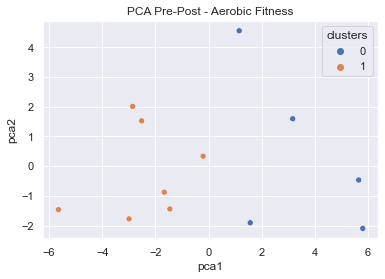

In [96]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled_1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results.to_csv('Pre-Post Aerobic Fitness PCAs.csv')

sns.scatterplot(x="pca1", y="pca2", hue=data_scaled_1['clusters'], data=results)
plt.title('PCA Pre-Post - Aerobic Fitness')
plt.savefig('Pre-Post - Aerobic Fitness PCA.jpg')
plt.show()

In [97]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_2)
clusters_new = data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(data_scaled_2)

In [98]:
clusters_new

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER,cluster_pred
0,1001,25,1.78,-2.9,-0.92,-1.5,-10,-10,0,3.7,...,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07,0
1,1015,20,1.82,-2.5,-0.75,-4.0,3,1,3,-0.3,...,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19,1
2,1018,18,1.82,2.6,0.78,2.0,-3,8,2,3.2,...,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09,1
3,1019,20,1.82,-6.3,-1.89,-9.0,7,3,0,-4.1,...,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06,0
4,1020,19,1.85,0.0,0.00,0.0,0,-9,-4,-5.6,...,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02,1
5,1021,22,1.80,0.0,0.00,0.0,8,0,-4,-3.7,...,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01,2
6,1022,19,1.87,0.9,0.26,-2.0,-7,-9,-21,-0.1,...,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10,1
7,1023,22,1.88,1.0,0.28,0.0,10,-5,3,-23.4,...,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01,1
8,1024,20,1.76,1.4,0.45,4.0,-12,-9,-13,0.7,...,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18,3
9,1026,18,1.71,0.1,0.03,1.5,3,-10,26,-1.0,...,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05,2


In [99]:
clusters_new.to_csv('Pre-Post K-Means by VO2max & VT2 (4 clusters).csv')

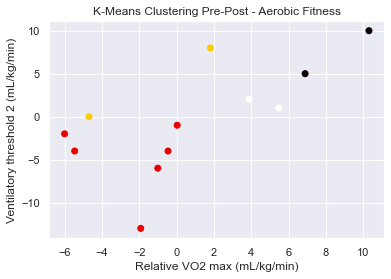

In [100]:
plt.scatter(clusters_new['Relative\nVO2 max\n(mL/kg/min)'],clusters_new['Ventilatory threshold 2\n(mL/kg/min)'], c=clusters_new['cluster_pred'],cmap='hot')
plt.title('K-Means Clustering Pre-Post - Aerobic Fitness')
plt.xlabel('Relative VO2 max (mL/kg/min)')
plt.ylabel('Ventilatory threshold 2 (mL/kg/min)')
#add legend with class names
plt.savefig('Pre-Post K-Means by VO2max & VT2 (4c).jpg')
plt.show()

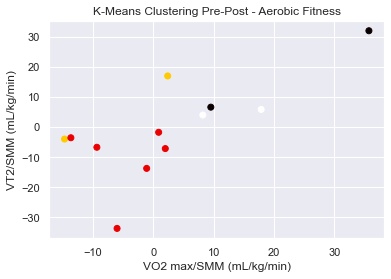

In [110]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_3)
clusters_new_1 = data.copy()
clusters_new_1['cluster_pred'] = kmeans_new.fit_predict(data_scaled_3)

clusters_new_1.to_csv('Pre-Post K-Means by VO2max & VT2 relative to SMM (4 clusters).csv')

plt.scatter(clusters_new_1['VO2 max/\nSMM\n(mL/kg/min)'],clusters_new_1['VT2/SMM\n(mL/kg/min)'],c=clusters_new_1['cluster_pred'],cmap='hot')
plt.title('K-Means Clustering Pre-Post - Aerobic Fitness')
plt.xlabel('VO2 max/SMM (mL/kg/min)')
plt.ylabel('VT2/SMM (mL/kg/min)')
plt.savefig('Pre-Post K-Means by VO2max & VT2 relative to SMM (4c).jpg')
plt.show()
